# Warehouse Optimization (Model Only)

## Initilization

In [77]:
import pandas as pd
import pandas_profiling
import numpy as np
data = pd.read_csv('ML_datafile.csv')
data.reset_index(drop=True, inplace=True)
data = data.drop(['Item No', 'Manufacturer No', 'Product Name', 'Date', 'STOCK TYPE', 'In Stock', 'List No',
                 'UPC Code', 'SaleRate','Blowout'], axis=1)
data

,Manufacturer,Category,Category Path 1,Category Path 2,Category Path 3,Price(USD),Cost price,Inventory,Shipping,Profit,weight(lb),SaleRateNew
0,Supermicro,Power Cable,Component,Cable,Power Cable,10.25,7.6875,1,2.5,0.0625,1.00,0.000000
1,ASUS,Bag & Sleeve,PC & Laptop,Accessory,Bag & Sleeve,9.23,4.2300,1,2.5,2.5000,0.50,0.000000
2,AMD,Others,Component,CPU / Processor,Desktop CPU,76.88,57.6600,1,2.5,16.7200,0.74,0.000000
3,QNAP,DDR3 1333,Component,DRAM Memory,Notebook DRAM,76.88,57.6600,1,0.0,19.2200,0.10,0.000000
4,Supermicro,Accessory,Hardware & Software,Server & Workstation,Accessory,92.76,69.5700,1,2.5,20.6900,0.50,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4195,NVIDIA,Nvidia,Component,Video Card,PCI Express Video Card,3854.00,2890.5000,1,2.5,961.0000,5.00,0.370787
4196,Supermicro,Accessory,Hardware & Software,Server & Workstation,Accessory,20.50,15.3750,1,2.5,2.6250,0.50,0.377778
4197,In Win,2U,Component,Server,Server Chassis,72.00,54.0000,1,3.5,14.5000,24.12,0.377778
4198,iStarUSA,3U,Component,Server,Server Chassis,143.50,107.6250,1,10.0,25.8750,29.00,0.377778


In [78]:
# limit to categorical data using df.select_dtypes()
#nominal_data = data.drop(['Price(USD)', 'Cost price', 'Inventory', 'Shipping', 'Profit', 'weight(lb)', 'SaleRateNew'], axis=1)
#ordinal_data = data.drop(nominal_data.columns)
nominal_data = data.select_dtypes(include=[object])
ordinal_data = data.drop(list(nominal_data.columns), axis=1)
nominal_data = nominal_data.replace(np.nan, 'Default', regex=True)

## One-Hot Encoding

In [79]:
from sklearn import preprocessing
nominal_data_2 = nominal_data
# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()
# 2. FIT
enc.fit(nominal_data_2)
# 3. Transform
onehotlabels = enc.transform(nominal_data_2).toarray()
print(onehotlabels.shape)

(4200, 458)


In [80]:
encoded_data = pd.concat([ordinal_data, pd.DataFrame(onehotlabels)], axis=1)

In [81]:
encoded_data.columns

Index([ 'Price(USD)',  'Cost price',   'Inventory',    'Shipping',
            'Profit',  'weight(lb)', 'SaleRateNew',             0,
                   1,             2,
       ...
                 448,           449,           450,           451,
                 452,           453,           454,           455,
                 456,           457],
      dtype='object', length=465)

In [82]:
encoded_data.head(30)

,Price(USD),Cost price,Inventory,Shipping,Profit,weight(lb),SaleRateNew,0,1,2,...,448,449,450,451,452,453,454,455,456,457
0,10.25,7.6875,1,2.5,0.0625,1.00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.23,4.2300,1,2.5,2.5000,0.50,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,76.88,57.6600,1,2.5,16.7200,0.74,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.88,57.6600,1,0.0,19.2200,0.10,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,92.76,69.5700,1,2.5,20.6900,0.50,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,186.55,139.9125,1,0.0,46.6375,0.08,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,263.94,197.9550,1,10.0,55.9850,28.00,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,262.40,196.8000,1,2.5,63.1000,5.00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,263.42,197.5650,1,2.5,63.3550,6.50,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,480.72,360.5400,1,2.5,117.6800,0.50,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
import warnings
warnings.filterwarnings('ignore')

In [94]:
#Library Import
import random
import pandas as pd
import numpy as np
import pickle
from sklearn import metrics
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import validation_curve


## Data Split

In [95]:
X = encoded_data.drop('SaleRateNew', axis=1)
Y = encoded_data['SaleRateNew']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state = 1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size= 0.5, random_state = 1)
X_train.head(5)

,Price(USD),Cost price,Inventory,Shipping,Profit,weight(lb),0,1,2,3,...,448,449,450,451,452,453,454,455,456,457
2490,81.99,61.4925,5,2.5,17.9975,3.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3291,146.58,109.9350,16,0.0,36.6450,0.10,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1690,40.99,30.7425,150,2.5,7.7475,0.84,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1672,145.00,108.7500,5,0.0,36.2500,0.07,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,25.62,19.2150,24,2.5,3.9050,0.50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Training with validation 

In [137]:
from matplotlib import pyplot as plt
%matplotlib inline

def test(models, X, Y, iterations = 10):
    results = {}
    for i in models:
        print("\nRunning ", i)
        r2_train = []
        r2_test = []
        mae_train = []
        mae_test = []
        mse_train = []
        mse_test = []
        mabe_train = []
        mabe_test = []
        mevs_train = []
        mevs_test = []
        for j in range(1, iterations):
            print(j, end='')
            h = int(4200/iterations*j)
            r2_test.append(metrics.r2_score(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            r2_train.append(metrics.r2_score(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_train)))
            mae_test.append(metrics.mean_absolute_error(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            mae_train.append(metrics.mean_absolute_error(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_train)))
            mse_test.append(metrics.mean_squared_error(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            mse_train.append(metrics.mean_squared_error(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_train)))
            mabe_test.append(metrics.median_absolute_error(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            mabe_train.append(metrics.median_absolute_error(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_train)))
            mevs_test.append(metrics.explained_variance_score(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            mevs_train.append(metrics.explained_variance_score(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_train)))
            
        plt.figure()
        plt.plot(r2_test, label='r2_test ')
        plt.xlabel('Iterations') 
        plt.ylabel('Score')
        plt.title("r2_test " + i)
        plt.figure()
        plt.plot(r2_train, label='r2_train')
        plt.xlabel('Iterations') 
        plt.ylabel('Score') 
        plt.title("r2_train " + i)
#mae        
        plt.figure()
        plt.plot(mae_test, label='mae_test ')
        plt.xlabel('Iterations') 
        plt.ylabel('Score')
        plt.title("mae_test " + i)
        plt.figure()
        plt.plot(mae_train, label='mae_train')
        plt.xlabel('Iterations') 
        plt.ylabel('Score') 
        plt.title("mae_train " + i)
#mse
        plt.figure()
        plt.plot(mse_test, label='mse_test ')
        plt.xlabel('Iterations') 
        plt.ylabel('Score')
        plt.title("mse_test " + i)
        plt.figure()
        plt.plot(mse_train, label='mse_train')
        plt.xlabel('Iterations') 
        plt.ylabel('Score') 
        plt.title("mse_train " + i)
#mabe        
        plt.figure()
        plt.plot(mabe_test, label='mabe_test')
        plt.xlabel('Iterations') 
        plt.ylabel('Score')
        plt.title("mabe_test" + i)
        plt.figure()
        plt.plot(mabe_train, label='mabe_train')
        plt.xlabel('Iterations') 
        plt.ylabel('Score') 
        plt.title("mabe_train" + i)
#mevs
        plt.figure()
        plt.plot(mevs_test, label='mevs_test ')
        plt.xlabel('Iterations') 
        plt.ylabel('Score')
        plt.title("mevs_test " + i)
        plt.figure()
        plt.plot(mevs_train, label='mevs_train')
        plt.xlabel('Iterations') 
        plt.ylabel('Score') 
        plt.title("mevs_train " + i)
        results[i] = [r2_train[-1], r2_test[-1],mae_train[-1],mae_test[-1] ]
    return pd.DataFrame(results), models

In [138]:
#, np.mean(r2_test), np.mean(mae_train), np.mean(mae_test), 
                     # np.mean(mse_train), np.mean(mse_test), np.mean(mevs_train), np.mean(mevs_test), 
                     # np.mean(mabe_train), np.mean(mabe_test)

In [139]:
models = {'OLS' : linear_model.LinearRegression(),
         'Lasso' : linear_model.Lasso(),
         'Ridge' : linear_model.Ridge(),
         'Ada' : AdaBoostRegressor(),
         'GBM': GradientBoostingRegressor(),
         #'BR' : BaggingRegressor()}
         'RFR' :RandomForestRegressor()}


Running  OLS
1234
Running  Lasso
1234
Running  Ridge
1234
Running  Ada
1234
Running  GBM
1234
Running  RFR
1234Wall time: 2min 51s


,OLS,Lasso,Ridge,Ada,GBM,RFR
0,0.727477,0.669600,0.725177,0.851826,0.911018,0.974238
1,0.641097,0.632811,0.651056,0.819859,0.825717,0.812244
2,0.426090,0.486787,0.429148,0.252537,0.210763,0.097321
3,0.472777,0.503995,0.466517,0.257754,0.247559,0.249708


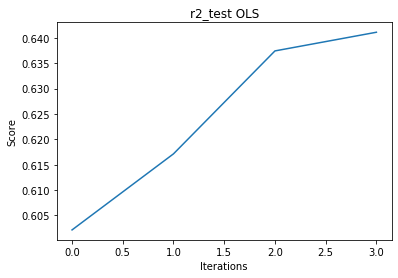

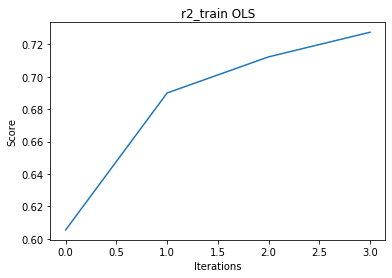

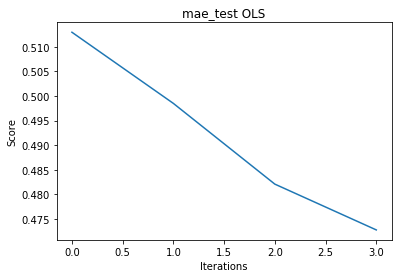

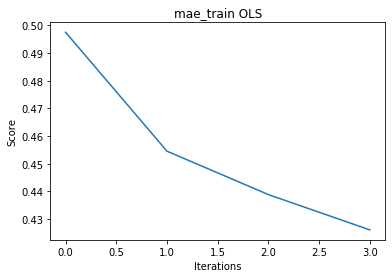

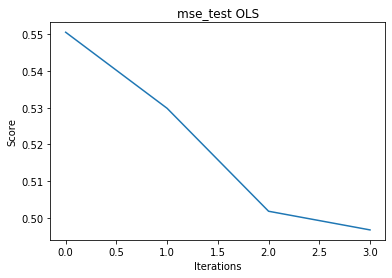

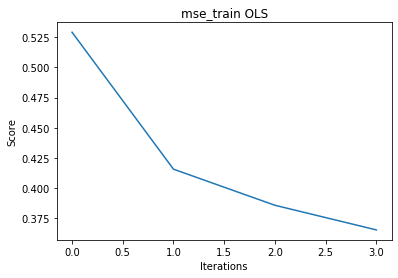

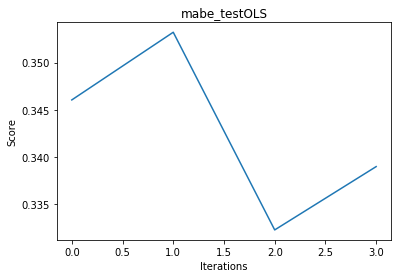

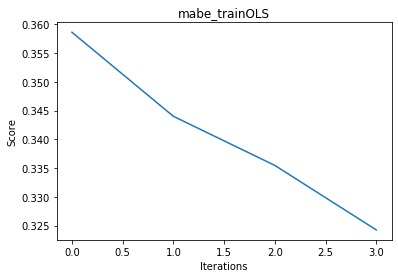

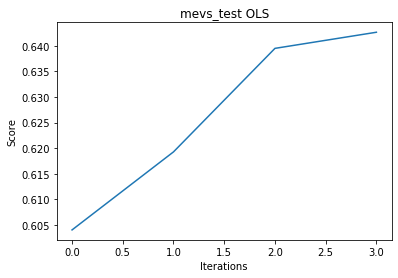

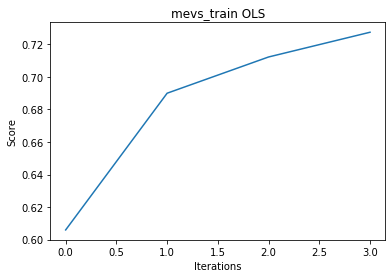

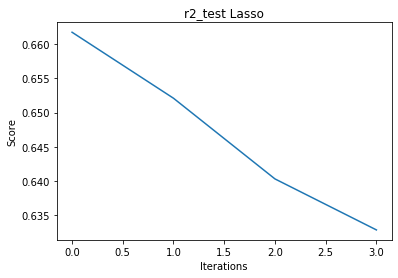

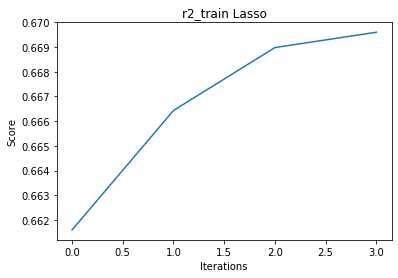

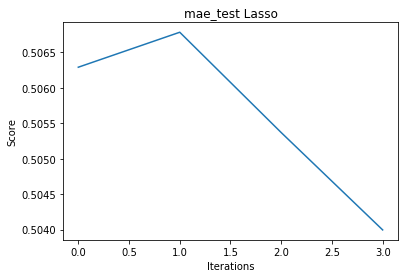

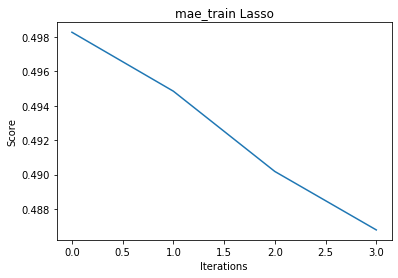

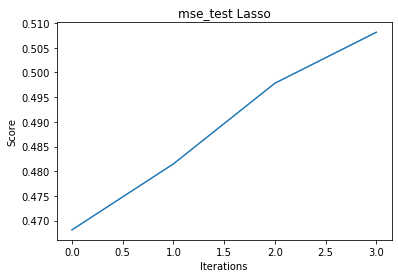

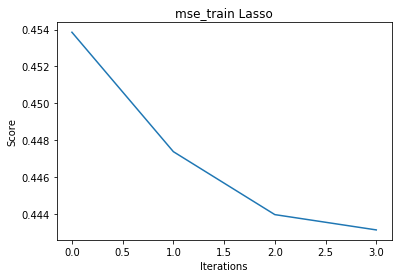

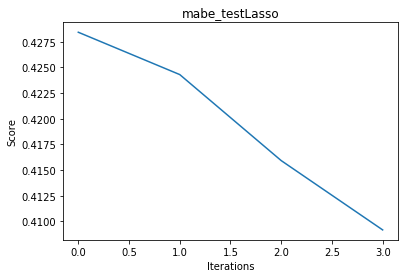

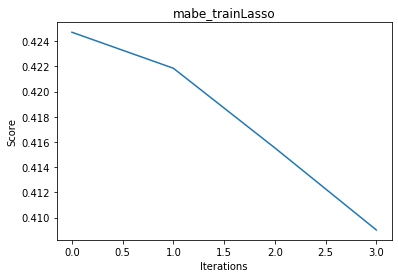

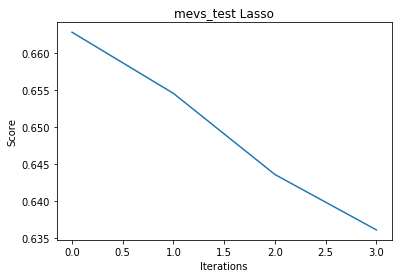

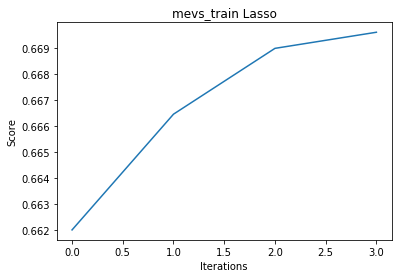

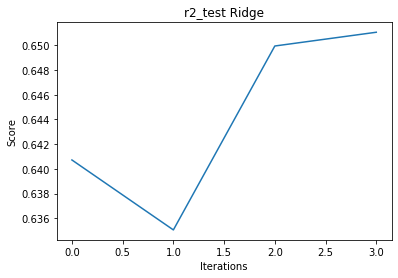

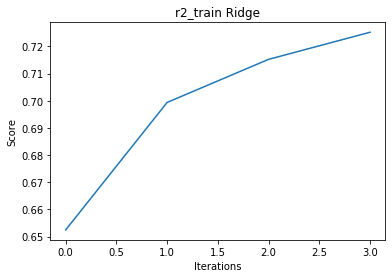

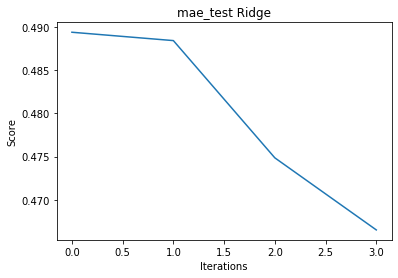

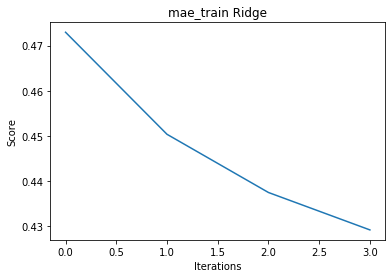

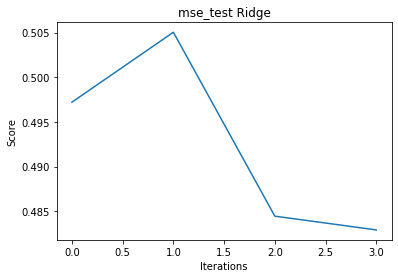

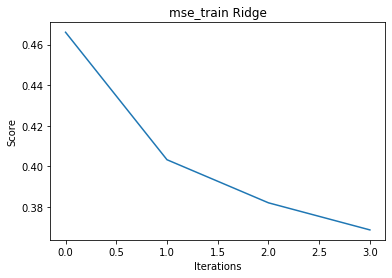

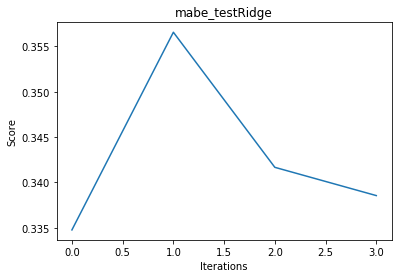

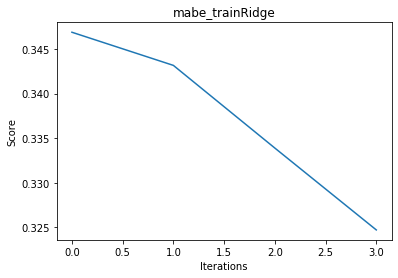

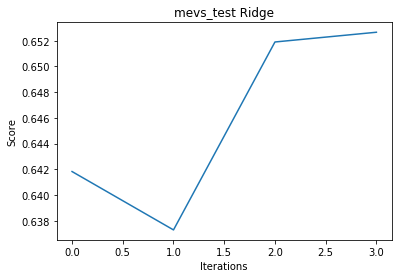

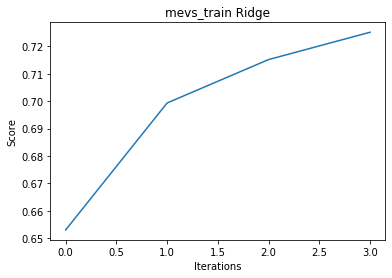

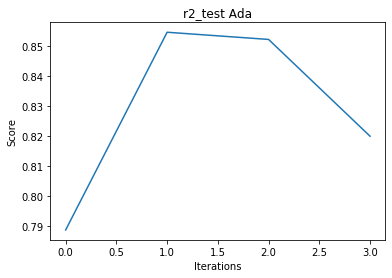

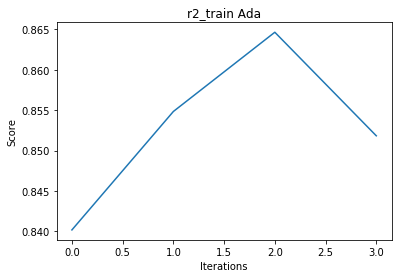

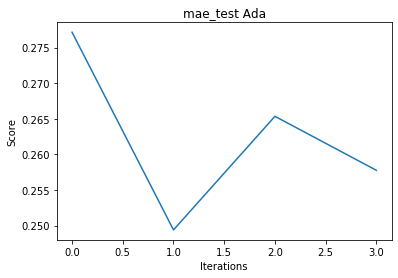

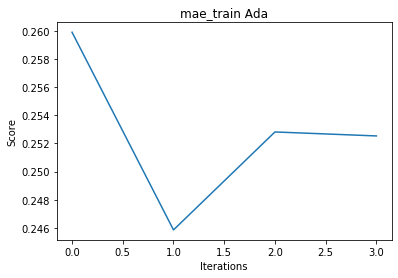

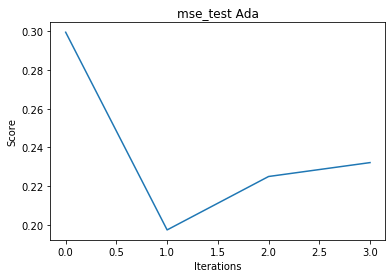

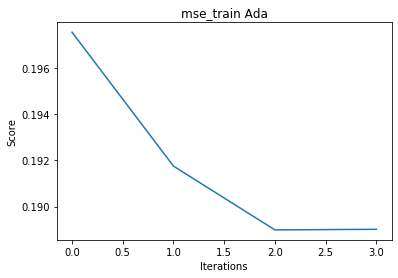

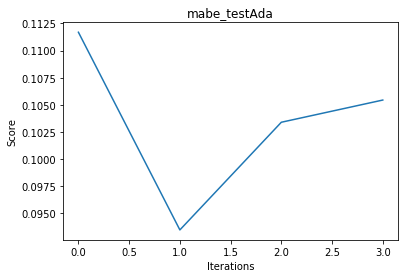

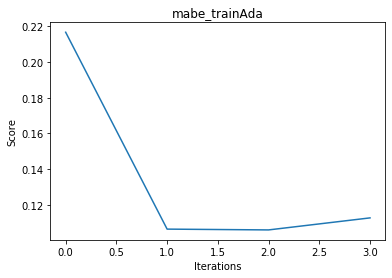

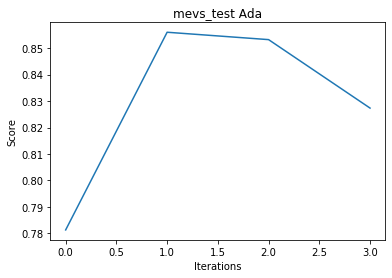

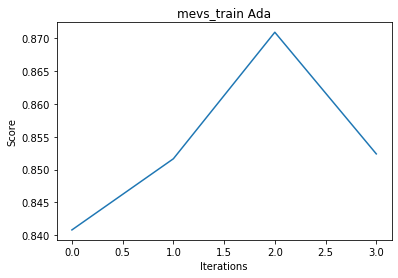

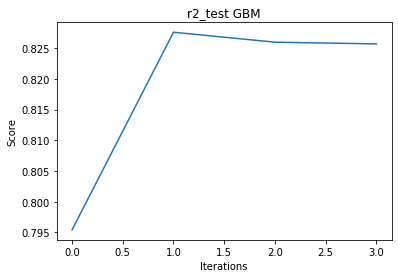

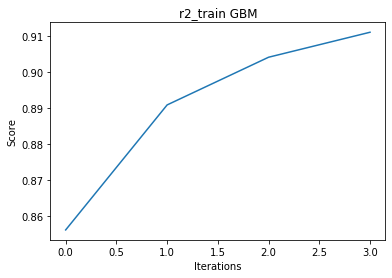

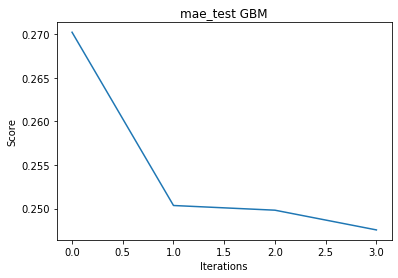

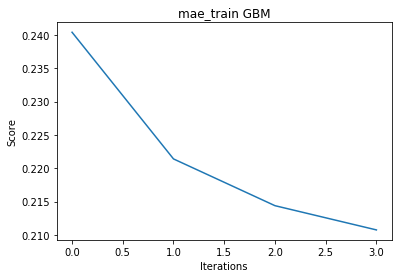

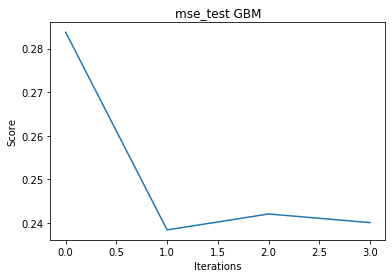

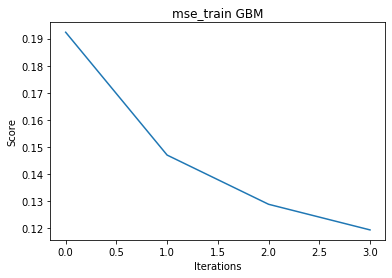

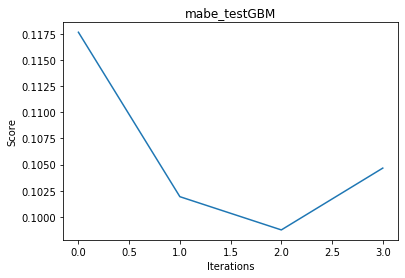

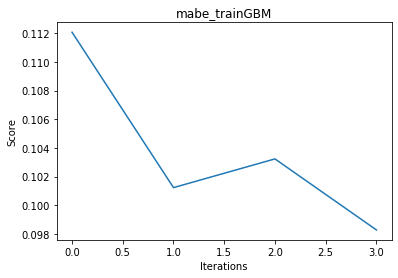

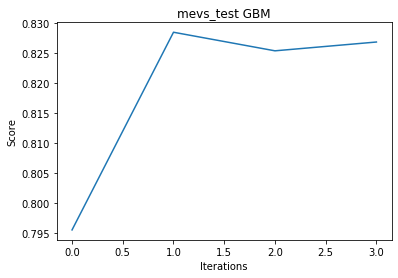

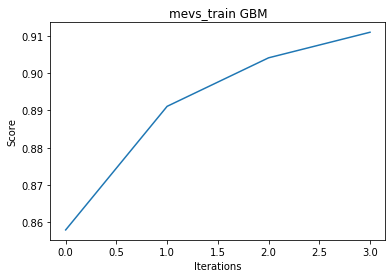

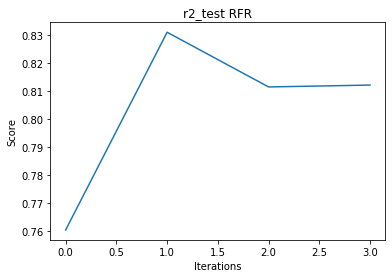

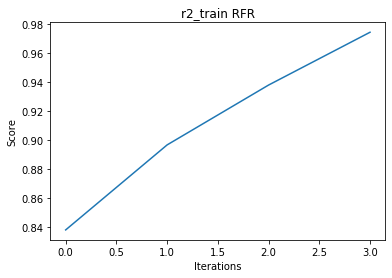

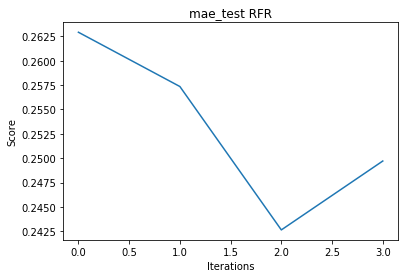

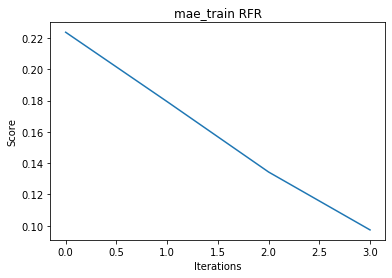

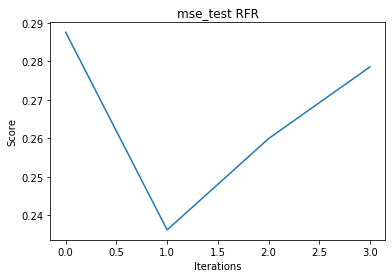

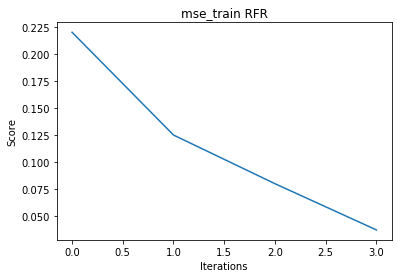

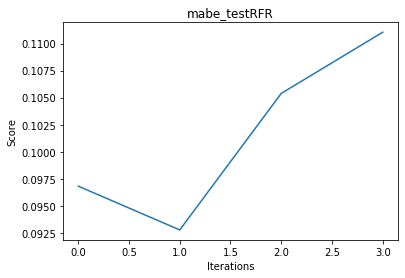

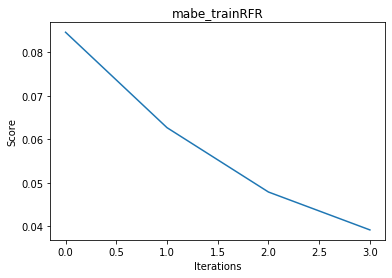

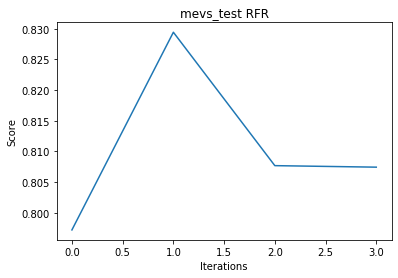

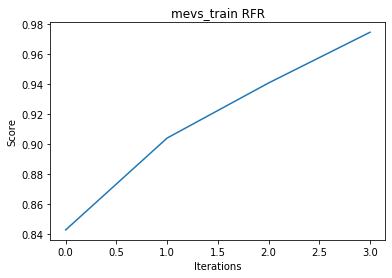

In [140]:
%time result, models = test(models, X, Y, iterations=5)
result


Running  OLS
123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899
Running  Lasso
123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899
Running  Ridge
123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899
Running  Ada
123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899
Running  GBM
12345678910111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


3456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899Wall time: 23min 36s


,OLS,Lasso,Ridge,Ada,GBM,RFR
0,-6.125597e+14,0.654524,0.686727,0.834982,0.882922,0.911144
1,-3.028037e+14,0.677281,0.656822,0.855674,0.872070,0.853175
2,5.972576e+05,0.486536,0.443576,0.267617,0.222424,0.161059
3,8.999847e+05,0.501004,0.488717,0.272596,0.247829,0.258291


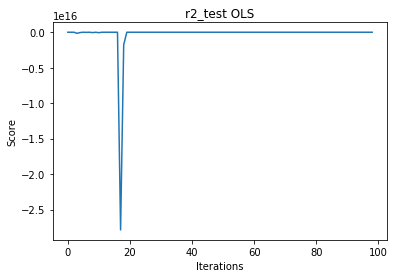

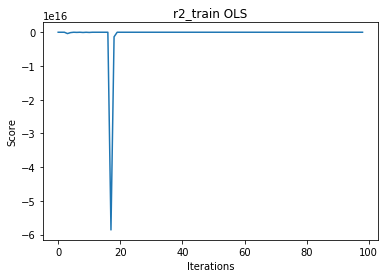

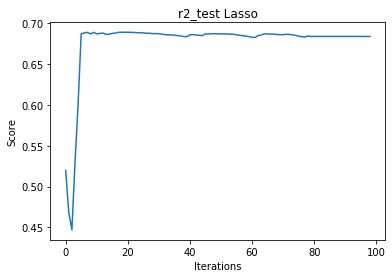

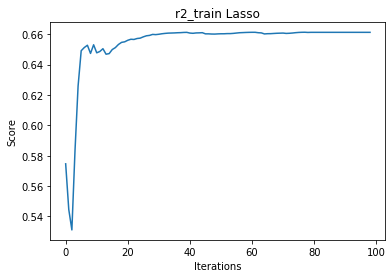

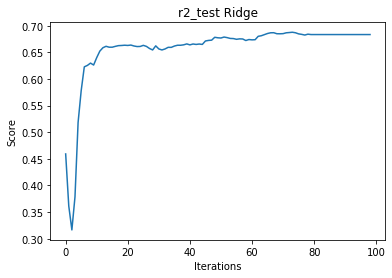

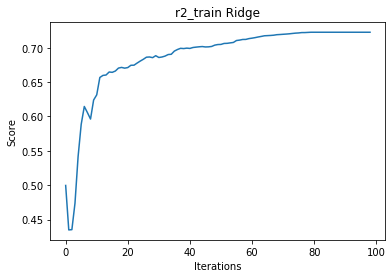

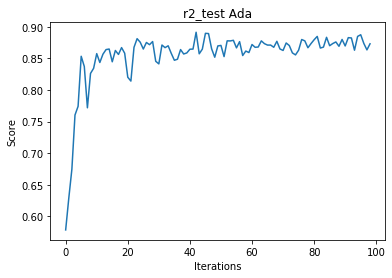

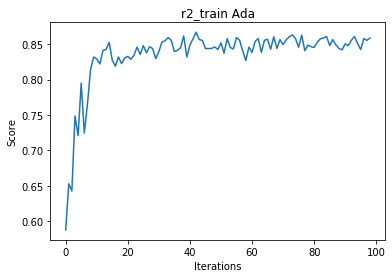

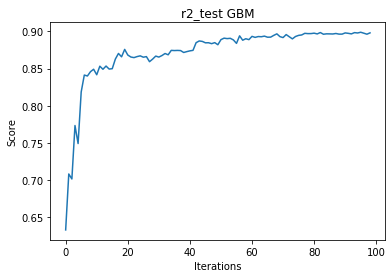

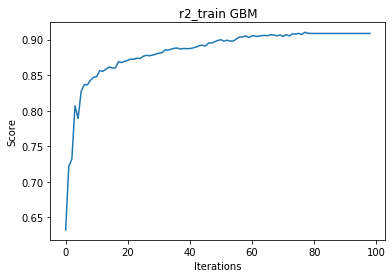

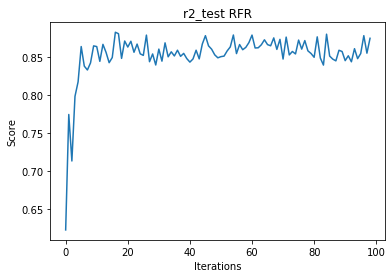

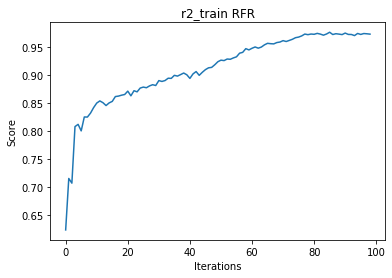

In [332]:
%time result, models = test(models, X, Y, iterations=100)
result

In [105]:
y_test.head(10)

3196    0.333333
4078    1.000000
2728    0.138889
2235    0.190476
3694    1.000000
3802    2.153846
2876    1.485714
1949    1.159091
3922    1.583333
2617    0.081081
Name: SaleRateNew, dtype: float64

In [108]:
y_pred = models['Ada'].predict(X_test)
y_pred[:10]

array([0.15834175, 0.85914041, 0.15834175, 0.15834175, 1.04179679,
       1.04754895, 1.04754895, 1.04754895, 1.04754895, 0.15834175])

### Tunning

In [ ]:
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

ada_param = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

gbm_param = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['ls', 'lad', 'huber', 'quantile']
 }

RFR_param = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}



models2 = {'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(X, Y).best_estimator_,
           'Ada': GridSearchCV(AdaBoostRegressor(), 
                               param_grid=ada_param).fit(X, Y).best_estimator_,
          'GBM': GridSearchCV(GradientBoostingRegressor(), 
                               param_grid=gbm_param).fit(X, Y).best_estimator_,
          'RFR': GridSearchCV(RandomForestRegressor(), 
                               param_grid=gbm_param).fit(X, Y).best_estimator_}
%time test(models2, X, Y)

In [ ]:
X_test.Inventory

#### Save and Load Machine Learning Models

In [ ]:
from joblib import dump, load
dump(models2['Ridge'], 'Ridge.joblib')

In [ ]:
Ridge = load('Ridge.joblib') 

In [ ]:
from joblib import dump, load
dump(models2['Ada'], 'Ada.joblib') 

In [ ]:
ada = load('Ada.joblib') 

In [ ]:
from joblib import dump, load
dump(models2['GBM'], 'GBM.joblib')

In [ ]:
GBM = load('GBM.joblib') 

In [ ]:
from joblib import dump, load
dump(models2['RFR'], 'RFR.joblib')

In [ ]:
RFR = load('RFR.joblib') 

In [ ]:
dump(models2['RFR'], 'RFR.joblib')

In [153]:
RFR = load('RFR.joblib')

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='exponential',
                  n_estimators=50, random_state=None)

In [154]:
models2['GBM']

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='quantile', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [155]:
GBM

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='quantile', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [123]:
#model prediction with testing
def test2(model, X, Y, iterations = 2):
    results = {}
    for i in model:
        print("\nRunning ", i)
        r2_train = []
        r2_test = []
        mae_train = []
        mae_test = []
        for j in range(1, iterations):
            print(j, end='')
                        r2_test.append(metrics.r2_score(y_test,
                                            model[i].predict(X_test)))
            r2_train.append(metrics.r2_score(y_train, 
                                             model[i].predict(X_train)))
            mae_test.append(metrics.mean_absolute_error(y_test,
                                            model[i].predict(X_test)))
            mae_train.append(metrics.mean_absolute_error(y_train, 
                                             model[i].predict(X_train)))
        plt.figure()
        plt.plot(r2_test, label='r2_test ')
        plt.xlabel('Iterations') 
        plt.ylabel('Score')
        plt.title("r2_test " + i)
        plt.figure()
        plt.plot(r2_train, label='r2_train')
        plt.xlabel('Iterations') 
        plt.ylabel('Score') 
        plt.title("r2_train " + i)
        results[i] = [np.mean(r2_train), np.mean(r2_test), np.mean(mae_train), np.mean(mae_test)]
    return pd.DataFrame(results), model

In [128]:
#metrics.r2_score(y_test,models2['Ada'].predict(X_test))

0.7480626472649516


Running  OLS
123456789
Running  Lasso
123456789
Running  Ridge
123456789
Running  Ada
123456789
Running  GBM
123456789
Running  RFR
123456789Wall time: 4.88 s


,OLS,Lasso,Ridge,Ada,GBM,RFR
0,0.712004,0.666845,0.713280,0.852758,0.899251,0.939447
1,0.626095,0.561279,0.621580,0.805418,0.877777,0.946791
2,0.440222,0.491443,0.441159,0.256600,0.216389,0.132455
3,0.391650,0.453576,0.396725,0.222002,0.189054,0.103012


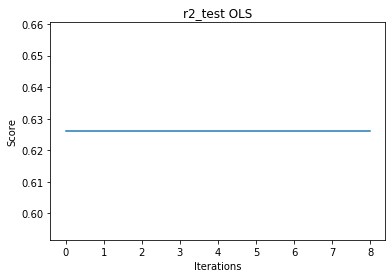

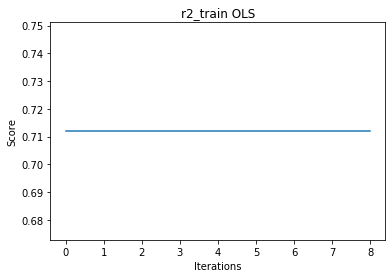

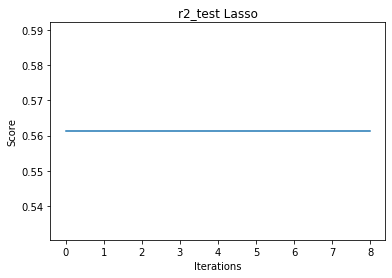

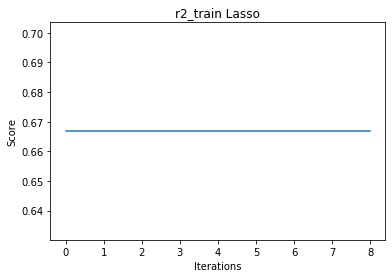

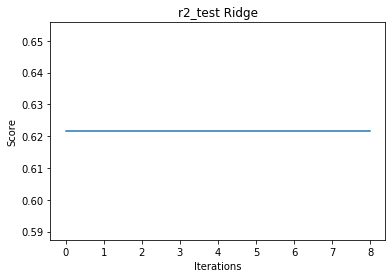

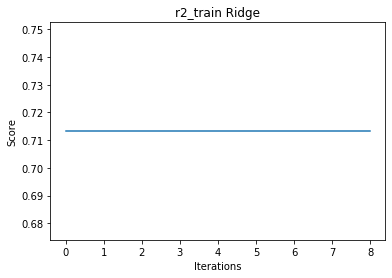

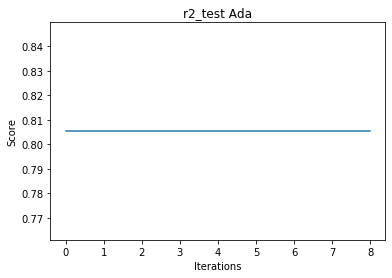

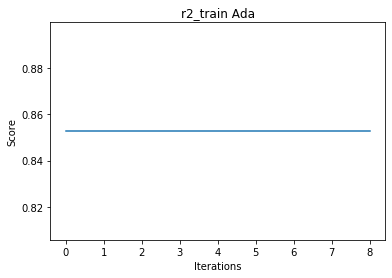

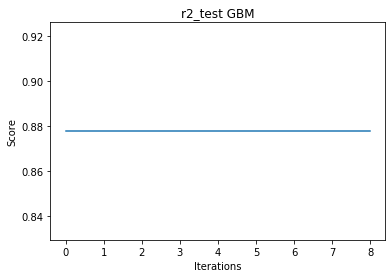

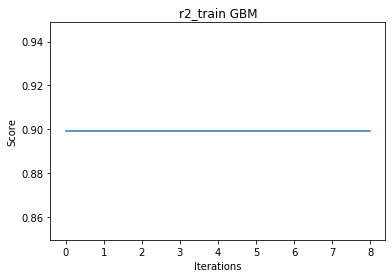

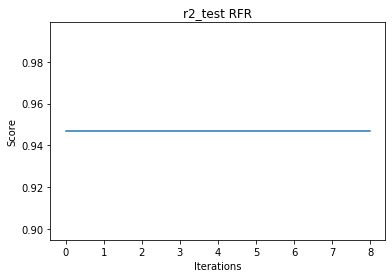

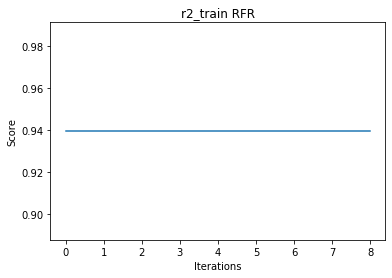

In [131]:
%time result, models = test2(models, X, Y)
result

In [125]:
X_test

,Price(USD),Cost price,Inventory,Shipping,Profit,weight(lb),0,1,2,3,...,448,449,450,451,452,453,454,455,456,457
2424,16.13,12.0975,4,2.5,1.5325,0.26,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2779,6.38,4.7850,51,0.0,1.5950,0.23,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,3.59,2.6925,52,0.0,0.8975,0.22,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
986,173.23,129.9225,2,2.5,40.8075,3.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3298,398.72,299.0400,3,2.5,97.1800,0.60,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,736.97,552.7275,30,2.5,181.7425,4.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1823,54.84,41.1300,4,2.5,11.2100,3.85,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1167,2930.48,2197.8600,1,10.0,722.6200,143.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2458,27.67,20.7525,51,0.0,6.9175,0.03,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Number of days prediction (i.e Blowout period)

In [286]:
y_pred = models2['GBM'].predict(X_test)
print(y_pred[:10])
print(y_test.head(10))

[4.21068369 0.94355756 1.43875513 1.45077714 0.29369139 0.20263618
 0.09897091 4.37715164 0.28800728 1.24840241]
1484    3.660000
3879    0.909091
168     0.333333
2806    1.457143
3076    0.300000
2479    0.125000
4       0.000000
3016    5.354839
2241    0.190476
40      0.066667
Name: SaleRateNew, dtype: float64


In [42]:
#blowout
#np.set_printoptions(formatter={'float_kind':float_formatter})
X_test['y_pred'] = y_pred
X_test['blowout_pred'] = pd.DataFrame({"Days" : X_test.Inventory / X_test['y_pred']})
X_test.head(10)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Price(USD),Cost price,Inventory,Shipping,Profit,weight(lb),Blowout,0,1,2,...,450,451,452,453,454,455,456,457,y_pred,blowout_pred
1273,141.45,106.0875,8,2.5,32.8625,4.00,57.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161317,49.591792
2573,525.31,393.9825,145,2.5,128.8275,1.65,38.531469,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.726113,38.914549
51,23.06,17.2950,14,2.5,3.2650,1.90,209.999999,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.053924,259.626195
712,584.25,438.1875,1,10.0,136.0625,36.00,77.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002455,407.332185
1254,2868.98,2151.7350,2,3.5,713.7450,11.20,57.999999,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037482,53.359272
3134,48.18,36.1350,20,0.0,12.0450,0.10,29.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.754140,26.520275
1183,224.48,168.3600,6,10.0,46.1200,39.20,60.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111255,53.930185
2542,676.50,507.3750,2,10.0,159.1250,45.00,40.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069859,28.628982
896,52.28,39.2100,51,2.5,10.5700,0.24,68.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.742433,68.693059
4188,10.25,7.6875,1,2.5,0.0625,0.12,2.903226,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.346543,2.885647


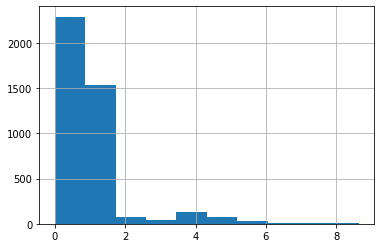

In [247]:
pd.plotting.hist_series(Y)